# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Patuh Rujhan Al Istizhar
- **Email:** patuh41@gmail.com
- **ID Dicoding:** patuh_istizhar

## Menentukan Pertanyaan Bisnis
- Di kota dan state mana pelanggan terbanyak berasal?
- Produk dalam kategori apa yang paling laris, dan kategori mana yang menyumbang pendapatan tertinggi?
- Metode pembayaran apa yang paling sering digunakan, dan mana yang menghasilkan total transaksi terbesar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from pathlib import Path

data_folder = Path("data")

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv(data_folder / "customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv(data_folder / "geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv(data_folder / "order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv(data_folder / "order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv(data_folder / "order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv(data_folder / "orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv(
    data_folder / "product_category_name_translation.csv"
)


product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv(data_folder / "products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv(data_folder / "sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset terdiri dari 9 tabel:
  - **customers_dataset**: berisi informasi pelanggan.
  - **geolocation_dataset**: berisi koordinat lokasi pengiriman.
  - **order_items_dataset**: berisi detail produk yang dibeli dalam setiap order.
  - **order_payments_dataset**: berisi metode dan jumlah pembayaran.
  - **order_reviews_dataset**: berisi ulasan dan rating dari pelanggan.
  - **orders_dataset**: berisi informasi utama tentang setiap order.
  - **products_dataset**: berisi detail produk yang dijual.
  - **sellers_dataset**: berisi informasi penjual.
  - **product_category_name_translation**: berisi terjemahan kategori produk.

### Assessing Data

Menilai tabel `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print(f"Jumlah data duplikat: {customers_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print(f"Jumlah data duplikat: {geolocation_df.duplicated().sum()}")

Jumlah data duplikat: 261831


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Menilai tabel `order_items_df`

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
print(f"Jumlah data duplikat: {order_items_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [22]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel `order_payments_df`

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print(f"Jumlah data duplikat: {order_payments_df.duplicated().sum()}")

Jumlah data duplikat: 0


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai tabel `order_reviews_df`

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print(f"Duplicate data: {order_reviews_df.duplicated().sum()}")

Duplicate data: 0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel `orders_df`

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
print(f"Duplicate data: {orders_df.duplicated().sum()}")

Duplicate data: 0


In [34]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel `product_category_name_translation`

In [35]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print(f"Duplicate data: {product_category_name_translation_df.duplicated().sum()}")

Duplicate data: 0


In [38]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai tabel `products_df`

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
print(f"Duplicate data: {products_df.duplicated().sum()}")

Duplicate data: 0


In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel `sellers`

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print(f"Duplicate data: {sellers_df.duplicated().sum()}")

Duplicate data: 0


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight**  

- **Duplikasi Data:**  
  Terdapat **261.831 data duplikat** pada tabel `geolocation_df`. Hal ini mungkin terjadi karena pencatatan koordinat yang sama untuk beberapa lokasi atau adanya duplikasi data.  

- **Kesalahan Tipe Data:**  
  - `shipping_limit_date` pada tabel `order_items_df` seharusnya dalam format **datetime**.  
  - `review_creation_date` dan `review_answer_timestamp` pada tabel `order_reviews_df` juga seharusnya dalam format **datetime**.  

- **Data Hilang (NaN):**  
  - **Tabel `order_reviews_df`**  
    - `review_comment_title`: **87.656 data hilang**  
    - `review_comment_message`: **58.247 data hilang**  
  - **Tabel `orders_df`**  
    - `order_approved_at`: **160 data hilang**  
    - `order_delivered_carrier_date`: **1.783 data hilang**  
    - `order_delivered_customer_date`: **2.965 data hilang**  
  - **Tabel `products_df`**  
    - `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`: **610 data hilang**  
    - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: **2 data hilang**

### Cleaning Data

#### Membersihkan tabel `geolocation_df`

Menghapus data duplikat dari tabel `geolocation_df`

In [47]:
geolocation_df = geolocation_df.drop_duplicates()
print(f"Jumlah data duplikat: {geolocation_df.duplicated().sum()}")

Jumlah data duplikat: 0


#### Membersihkan tabel `orders_item_df`

Mengganti tipe data `shipping_limit_date` menjadi `datetime`

In [48]:
order_items_df["shipping_limit_date"] = pd.to_datetime(
    order_items_df["shipping_limit_date"]
)

In [49]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan `tabel order_reviews_df`

Mengganti tipe data `review_creation_date` dan `review_answer_timestamp` menjadi `datetime`

In [50]:
datetime_order_review = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_order_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [51]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Mengisi missing value pada data `review_comment_title` dan `review_answer_message`

In [52]:
order_reviews_df["review_comment_title"] = order_reviews_df[
    "review_comment_title"
].fillna("No Title")
order_reviews_df["review_comment_message"] = order_reviews_df[
    "review_comment_message"
].fillna("No Message")

In [53]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan tabel `orders_df`

Mengganti tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`, menjadi `datetime`

In [54]:
datetime_orders = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
for column in datetime_orders:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengisi missing value pada data `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`

In [56]:
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(
    orders_df["order_purchase_timestamp"]
)
orders_df["order_delivered_carrier_date"] = orders_df[
    "order_delivered_carrier_date"
].fillna(orders_df["order_purchase_timestamp"])
orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].fillna(orders_df["order_estimated_delivery_date"])

In [57]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan tabel `product_df`

Mengisi missing value

In [58]:
products_df["product_category_name"] = products_df["product_category_name"].fillna(
    "Others"
)

In [59]:
numeric_columns = products_df.select_dtypes(include=[np.number])
products_df[numeric_columns.columns] = products_df[numeric_columns.columns].fillna(
    numeric_columns.median()
)

In [60]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- **Duplikasi data telah dihapus**, meningkatkan akurasi dan kualitas dataset untuk analisis.  
- **Tipe data telah disesuaikan**, memungkinkan penggunaan metode analisis yang lebih tepat.  
- **Missing values telah ditangani**, memastikan data tetap representatif dan siap untuk dianalisis lebih lanjut.  

## Exploratory Data Analysis (EDA)

#### Explore datatabel `customers_df`

In [61]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [62]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [63]:
customers_df["customer_id"].is_unique

True

Mencari pelanggan terbanyak berdasarkan **Kota** dan **State**

In [64]:
customers_df.groupby(by="customer_city")["customer_id"].nunique().sort_values(
    ascending=False
)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [65]:
customers_df.groupby("customer_state")["customer_id"].nunique().sort_values(
    ascending=False
)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Eksplorasi tabel **orders, products, dan product_category_name_english** untuk mencari kategori produk dengan jumlah transaksi terbanyak.

In [66]:
order_items_products = order_items_df.merge(
    products_df, how="left", on="product_id"
).merge(product_category_name_translation_df, how="left", on="product_category_name")

In [67]:
order_items_products.groupby(by="product_category_name_english")[
    "order_id"
].count().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: order_id, dtype: int64

Menggabungkan seluruh dataset menjadi `main_df`

In [68]:
main_df = (
    customers_df.merge(orders_df, how="left", on="customer_id")
    .merge(order_items_df, how="left", on="order_id")
    .merge(products_df, how="left", on="product_id")
    .merge(product_category_name_translation_df, how="left", on="product_category_name")
    .merge(sellers_df, how="left", on="seller_id")
    .merge(order_payments_df, how="left", on="order_id")
    .merge(order_reviews_df, how="left", on="order_id")
)

In [69]:
main_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,No Message,2018-04-14,2018-04-28 11:15:04
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,No Title,No Message,2018-04-12,2018-04-16 10:36:05
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,No Title,No Message,2017-11-17,2017-11-19 23:34:18


**Insight:**
- São Paulo sebagai kota memiliki jumlah pelanggan terbanyak, begitu pula negara bagian São Paulo yang menjadi wilayah dengan pelanggan terbanyak secara keseluruhan.
- Kategori produk **bed, bath & table** menjadi yang paling laris berdasarkan jumlah transaksi.  
- Setelah semua tabel digabungkan menjadi **main_df**, dataset terdiri dari 119.143 baris dan 40 kolom.

## Visualization & Explanatory Analysis

In [70]:
# Set theme
from cycler import cycler



monoblue_theme = {
    "axes.spines.top": False,
    "axes.spines.right": False,
    "xtick.minor.visible": False,
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "ytick.minor.visible": False,
    "yaxis.labellocation": "top",
    "xaxis.labellocation": "right",
    "scatter.marker": "o",
    "lines.linewidth": 2.0,
    "axes.labelsize": 12,
    "axes.linewidth": 1.0,
    "text.color": "#002060",
    "axes.facecolor": "#EBF5FF",
    "figure.facecolor": "#EBF5FF",
    "axes.labelcolor": "#002060",
    "axes.edgecolor": "#002060",
    "xtick.color": "#002060",
    "ytick.color": "#002060",
    "axes.prop_cycle": cycler(
        "color", ["#002060", "#4682B4", "#ADD8E6", "#B0C4DE", "#778899"]
    ),
}

plt.rcParams.update(monoblue_theme)

### Pertanyaan 1:

#### Di kota dan state mana pelanggan terbanyak berasal?

**Kota**

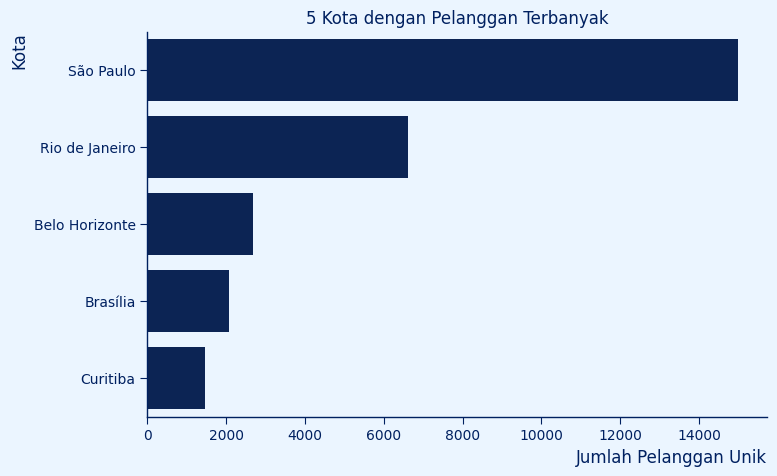

In [71]:
# Mapping nama 5 data kota teratas
city_mapping = {
    "sao paulo": "São Paulo",
    "rio de janeiro": "Rio de Janeiro",
    "belo horizonte": "Belo Horizonte",
    "brasilia": "Brasília",
    "curitiba": "Curitiba",
}

# Hitung jumlah pelanggan unik per kota
city_counts = (
    main_df.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .reset_index()
    .sort_values(by="customer_unique_id", ascending=False)
)

# Buat kolom baru dengan nama kota yang telah diperbaiki
city_counts["city_mapped"] = (
    city_counts["customer_city"].map(city_mapping).fillna(city_counts["customer_city"])
)

# Ambil 5 kota dengan pelanggan terbanyak
top_cities = city_counts.head()

# Plot bar chart untuk kota dengan pelanggan terbanyak
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_cities,
    x="customer_unique_id",
    y="city_mapped",
)

# Atur label dan judul
ax.set_xlabel("Jumlah Pelanggan Unik")
ax.set_ylabel("Kota")
ax.set_title("5 Kota dengan Pelanggan Terbanyak")

# Tampilkan plot
plt.show()

**State**

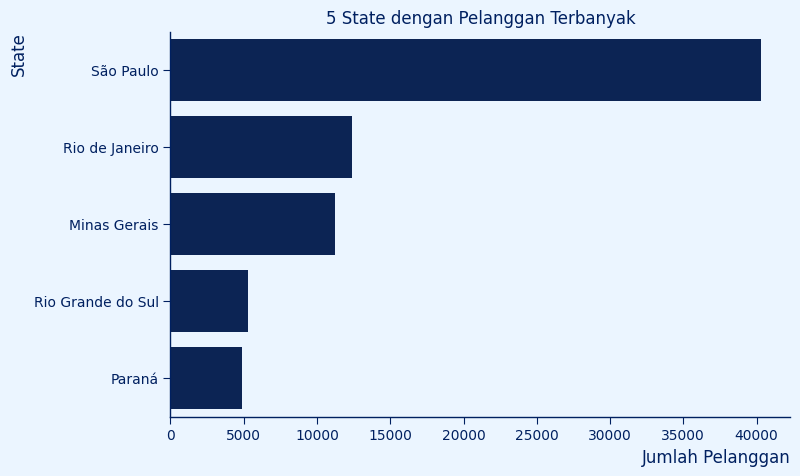

In [72]:
# Mapping kode state ke nama lengkap
state_mapping = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AP": "Amapá",
    "AM": "Amazonas",
    "BA": "Bahia",
    "CE": "Ceará",
    "DF": "Distrito Federal",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "MA": "Maranhão",
    "MT": "Mato Grosso",
    "MS": "Mato Grosso do Sul",
    "MG": "Minas Gerais",
    "PA": "Pará",
    "PB": "Paraíba",
    "PR": "Paraná",
    "PE": "Pernambuco",
    "PI": "Piauí",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RS": "Rio Grande do Sul",
    "RO": "Rondônia",
    "RR": "Roraima",
    "SC": "Santa Catarina",
    "SP": "São Paulo",
    "SE": "Sergipe",
    "TO": "Tocantins",
}

# Hitung jumlah pelanggan unik per state
state_counts = (
    main_df.groupby("customer_state")["customer_unique_id"]
    .nunique()
    .reset_index()
    .sort_values(by="customer_unique_id", ascending=False)
)

# Buat kolom baru dengan nama state yang telah diperbaiki
state_counts["customer_state"] = (
    state_counts["customer_state"]
    .map(state_mapping)
    .fillna(state_counts["customer_state"])
)

# Ambil 5 state dengan pelanggan terbanyak
top_states = state_counts.head()

# Plot bar chart untuk state dengan pelanggan terbanyak
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_states,
    x="customer_unique_id",
    y="customer_state",
)

# Atur label dan judul
ax.set_xlabel("Jumlah Pelanggan")
ax.set_ylabel("State")
ax.set_title("5 State dengan Pelanggan Terbanyak")

# Tampilkan plot
plt.show()

### Pertanyaan 2:

#### Produk dalam kategori apa yang paling laris, dan kategori mana yang menyumbang pendapatan tertinggi?

In [73]:
# Mapping nama kategori
category_mapping = {
    "office_furniture": "Office Furniture",
    "housewares": "Housewares",
    "home_confort": "Home Comfort",
    "sports_leisure": "Sports & Leisure",
    "computers_accessories": "Computers & Accessories",
    "toys": "Toys",
    "furniture_decor": "Furniture & Decor",
    "auto": "Automotive",
    "air_conditioning": "Air Conditioning",
    "telephony": "Telephony",
    "health_beauty": "Health & Beauty",
    "garden_tools": "Garden Tools",
    "pet_shop": "Pet Shop",
    "bed_bath_table": "Bed, Bath & Table",
    "baby": "Baby Products",
    "watches_gifts": "Watches & Gifts",
    "kitchen_dining_laundry_garden_furniture": "Kitchen, Dining & Garden Furniture",
    "perfumery": "Perfumery",
    "art": "Art",
    "stationery": "Stationery",
    "fashio_female_clothing": "Women's Clothing",
    "consoles_games": "Consoles & Games",
    "construction_tools_lights": "Construction Tools & Lights",
    "food_drink": "Food & Drink",
    "drinks": "Beverages",
    "cool_stuff": "Cool Stuff",
    "fashion_bags_accessories": "Bags & Accessories",
    "home_construction": "Home Construction",
    "luggage_accessories": "Luggage & Accessories",
    "electronics": "Electronics",
    "home_appliances_2": "Home Appliances",
    "fashion_male_clothing": "Men's Clothing",
    "small_appliances": "Small Appliances",
    "small_appliances_home_oven_and_coffee": "Oven & Coffee Appliances",
    "books_general_interest": "Books - General",
    "home_appliances": "Home Appliances",
    "costruction_tools_tools": "Construction Tools",
    "signaling_and_security": "Signaling & Security",
    "musical_instruments": "Musical Instruments",
    "construction_tools_construction": "Construction Equipment",
    "music": "Music",
    "fashion_shoes": "Shoes",
    "industry_commerce_and_business": "Industry & Commerce",
    "fashion_underwear_beach": "Underwear & Beachwear",
    "dvds_blu_ray": "DVDs & Blu-ray",
    "construction_tools_safety": "Construction Safety",
    "food": "Food",
    "fixed_telephony": "Fixed Telephony",
    "furniture_living_room": "Living Room Furniture",
    "tablets_printing_image": "Tablets & Printing",
    "market_place": "Marketplace",
    "christmas_supplies": "Christmas Supplies",
    "agro_industry_and_commerce": "Agro Industry & Commerce",
    "costruction_tools_garden": "Garden Construction Tools",
    "computers": "Computers",
    "furniture_bedroom": "Bedroom Furniture",
    "audio": "Audio",
    "books_imported": "Imported Books",
    "books_technical": "Technical Books",
    "party_supplies": "Party Supplies",
    "furniture_mattress_and_upholstery": "Mattresses & Upholstery",
    "la_cuisine": "La Cuisine",
    "flowers": "Flowers",
    "diapers_and_hygiene": "Diapers & Hygiene",
    "cine_photo": "Cinema & Photography",
    "cds_dvds_musicals": "CDs, DVDs & Musicals",
    "fashion_sport": "Sportswear",
    "home_comfort_2": "Home Comfort",
    "arts_and_craftmanship": "Arts & Craftsmanship",
    "fashion_childrens_clothes": "Children's Clothing",
    "security_and_services": "Security & Services",
}

Kategori Produk Terlaris

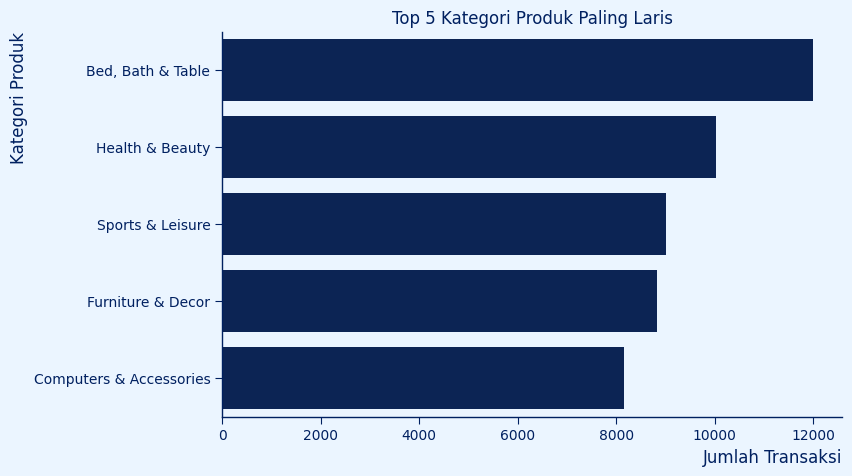

In [74]:
# Hitung jumlah transaksi per kategori produk
top_categories = (
    main_df.groupby("product_category_name_english")["order_item_id"]
    .count()
    .reset_index()
    .sort_values(by="order_item_id", ascending=False)
)

# Buat kolom baru dengan nama kategori yang telah diperbaiki
top_categories["category_mapped"] = (
    top_categories["product_category_name_english"]
    .map(category_mapping)
    .fillna(top_categories["product_category_name_english"])
)

# # Ambil 5 kategori produk terlaris
top_categories = top_categories.head()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_categories,
    x="order_item_id",
    y="category_mapped",
)

# Atur label dan judul
ax.set_xlabel("Jumlah Transaksi")
ax.set_ylabel("Kategori Produk")
ax.set_title("Top 5 Kategori Produk Paling Laris")

# Tampilkan plot
plt.show()

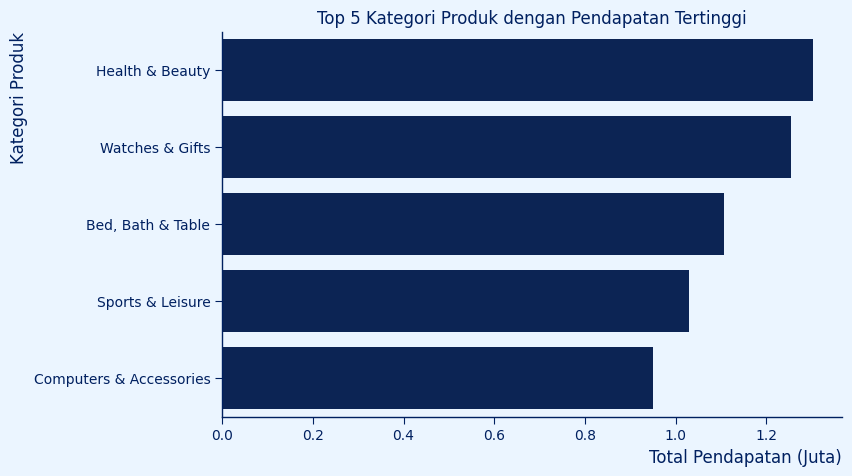

In [75]:
# Hitung total pendapatan per kategori
top_revenue_categories = (
    main_df.groupby("product_category_name_english")["price"]
    .sum()
    .reset_index()
    .sort_values(by="price", ascending=False)
)

# Ubah nilai price ke dalam jutaan
top_revenue_categories["price_millions"] = top_revenue_categories["price"] / 1000000


# Buat kolom baru dengan nama kategori yang telah diperbaiki
top_revenue_categories["category_mapped"] = (
    top_revenue_categories["product_category_name_english"]
    .map(category_mapping)
    .fillna(top_revenue_categories["product_category_name_english"])
)

# Ambil 5 kategori produk dengan revenue tertinggi
top_revenue_categories = top_revenue_categories.head()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_revenue_categories,
    x="price_millions",
    y="category_mapped",
)

# Atur label dan judul
ax.set_xlabel("Total Pendapatan (Juta)")
ax.set_ylabel("Kategori Produk")
ax.set_title("Top 5 Kategori Produk dengan Pendapatan Tertinggi")

# Tampilkan plot
plt.show()

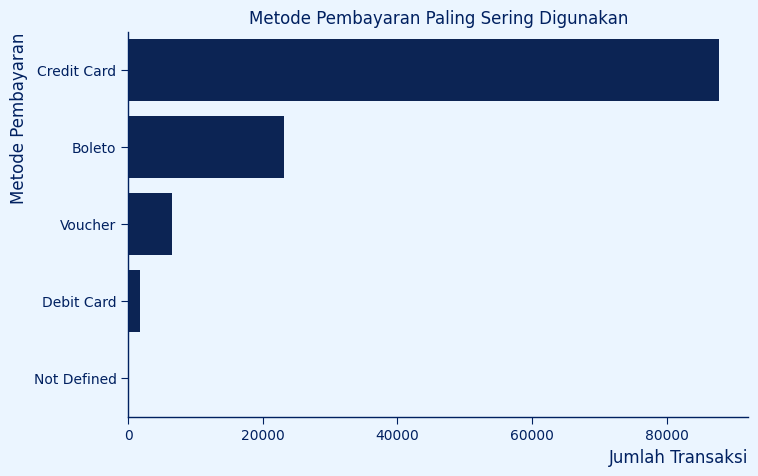

In [76]:
# Mapping metode pembayaran
payment_mapping = {
    "credit_card": "Credit Card",
    "boleto": "Boleto",
    "voucher": "Voucher",
    "debit_card": "Debit Card",
    "not_defined": "Not Defined",
}

# Hitung jumlah transaksi berdasarkan metode pembayaran
payment_counts = main_df["payment_type"].value_counts().reset_index()

# Buat kolom baru dengan nama metode pembayaran yang telah diperbaiki
payment_counts["payment_mapped"] = payment_counts["payment_type"].map(payment_mapping)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=payment_counts,
    x="count",
    y="payment_mapped",
)

# Format chart
ax.set_xlabel("Jumlah Transaksi")
ax.set_ylabel("Metode Pembayaran")
ax.set_title("Metode Pembayaran Paling Sering Digunakan")

# Tampilkan plot
plt.show()

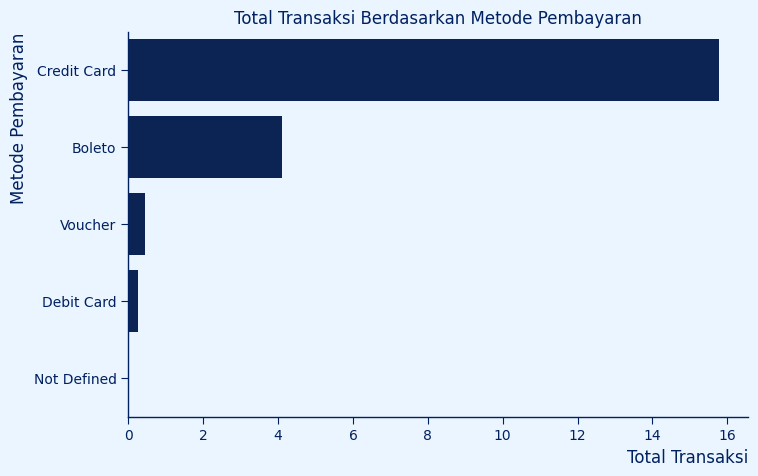

In [77]:
# Mapping metode pembayaran
payment_mapping = {
    "credit_card": "Credit Card",
    "boleto": "Boleto",
    "voucher": "Voucher",
    "debit_card": "Debit Card",
    "not_defined": "Not Defined",
}

# Hitung total transaksi berdasarkan metode pembayaran
payment_totals = (
    main_df.groupby("payment_type")["payment_value"]
    .sum()
    .reset_index()
    .sort_values(by="payment_value", ascending=False)
)

# Buat kolom baru dengan nama metode pembayaran yang telah diperbaiki
payment_totals["payment_mapped"] = payment_totals["payment_type"].map(payment_mapping)

# Ubah nilai payment_value ke dalam jutaan
payment_totals["payment_value_millions"] = payment_totals["payment_value"] / 1000000

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=payment_totals,
    x="payment_value_millions",
    y="payment_mapped",
)

# Format chart
ax.set_xlabel("Total Transaksi")
ax.set_ylabel("Metode Pembayaran")
ax.set_title("Total Transaksi Berdasarkan Metode Pembayaran")

# Tampilkan plot
plt.show()

**Insight:**
- Kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte memiliki jumlah pelanggan terbanyak, menunjukkan bahwa mayoritas transaksi berasal dari pusat ekonomi utama di Brasil.  
- Kategori produk **Bed, Bath & Table** serta **Health & Beauty** termasuk yang paling laris, sementara kategori **Health & Beauty** serta **Watches & Gifts** mencatatkan pendapatan tertinggi. Hal ini mengindikasikan bahwa kategori dengan transaksi terbanyak tidak selalu menghasilkan pendapatan tertinggi, kemungkinan karena variasi harga produk.  
- **Kartu kredit merupakan metode pembayaran paling dominan**, menunjukkan bahwa pelanggan lebih nyaman menggunakan kartu kredit dibanding metode lain. Oleh karena itu, perlu dipastikan sistem pembayaran dengan kartu kredit selalu berjalan lancar, misalnya dengan memastikan keamanan transaksi dan memberikan promosi khusus bagi pengguna kartu kredit.

## Analisis Lanjutan

### RFM (Recency, Frequency, dan Monetary)

In [78]:
# Pastikan kolom waktu transaksi berbentuk datetime
main_df["order_purchase_timestamp"] = pd.to_datetime(
    main_df["order_purchase_timestamp"]
)

# Tetapkan reference_date sebagai tanggal maksimum dalam dataset
reference_date = main_df["order_purchase_timestamp"].dt.date.max()

# Hitung nilai RFM
rfm = (
    main_df.groupby("customer_unique_id")
    .agg(
        Recency=(
            "order_purchase_timestamp",
            lambda x: (reference_date - x.max().date()).days,
        ),
        Frequency=("order_id", "nunique"),
        Monetary=("payment_value", "sum"),
    )
    .reset_index()
)

# Normalisasi nilai RFM dengan skala 1-5 (quintile ranking)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# Buat segmen RFM
rfm["RFM_Segment"] = (
    rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)


# Klasifikasi pelanggan berdasarkan RFM Score
def classify_rfm(score):
    if score >= 12:
        return "Loyal Customer"
    elif score >= 9:
        return "Potential Loyalist"
    elif score >= 6:
        return "At Risk"
    else:
        return "Lost Customer"


rfm["Customer_Segment"] = rfm["RFM_Score"].apply(classify_rfm)

# Tampilkan hasil RFM Analysis
print(rfm.head())

                 customer_unique_id  Recency  Frequency  Monetary R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1    141.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     27.19       4   
2  0000f46a3911fa3c0805444483337064      586          1     86.22       1   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62       2   
4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89       2   

  F_Score M_Score RFM_Segment  RFM_Score    Customer_Segment  
0       1       4         414          9  Potential Loyalist  
1       1       1         411          6             At Risk  
2       1       2         112          4       Lost Customer  
3       1       1         211          4       Lost Customer  
4       1       4         214          7             At Risk  


**Distribusi Recency, Frequency, dan Monetary**

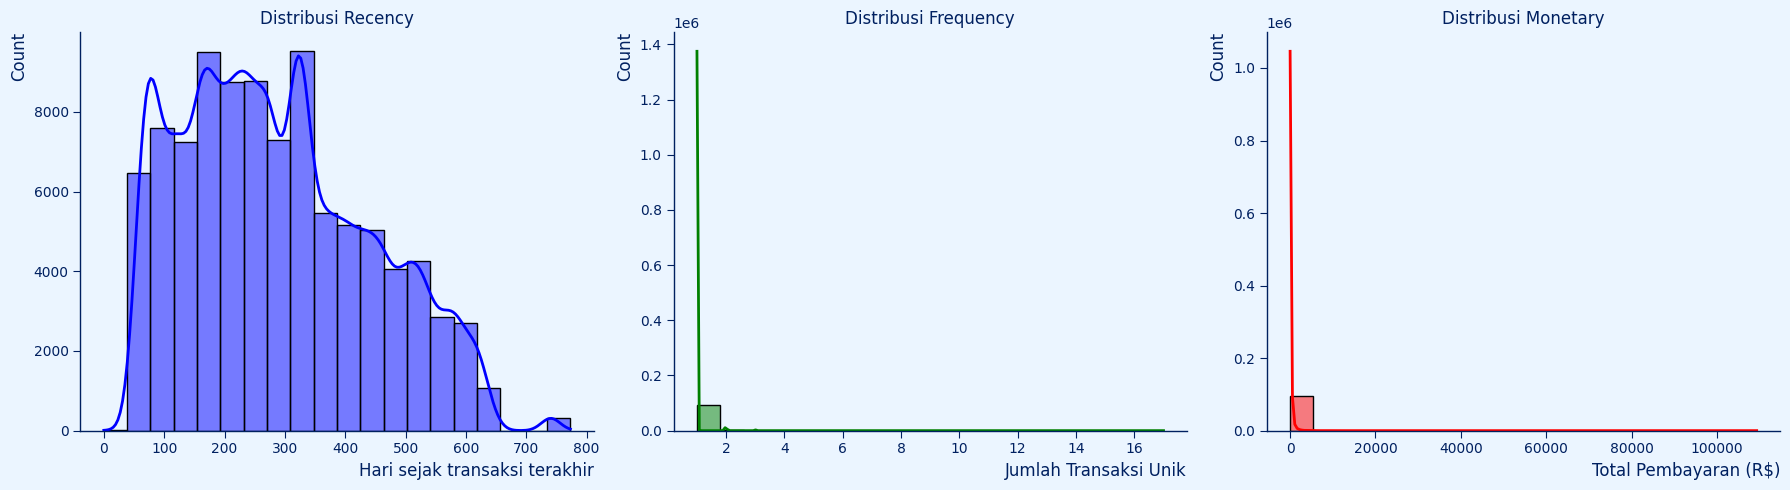

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=20, kde=True, ax=ax[0], color="blue")
ax[0].set_title("Distribusi Recency")
ax[0].set_xlabel("Hari sejak transaksi terakhir")

sns.histplot(rfm["Frequency"], bins=20, kde=True, ax=ax[1], color="green")
ax[1].set_title("Distribusi Frequency")
ax[1].set_xlabel("Jumlah Transaksi Unik")

sns.histplot(rfm["Monetary"], bins=20, kde=True, ax=ax[2], color="red")
ax[2].set_title("Distribusi Monetary")
ax[2].set_xlabel("Total Pembayaran (R$)")

plt.tight_layout()
plt.show()

**Segmentasi Pelanggan**

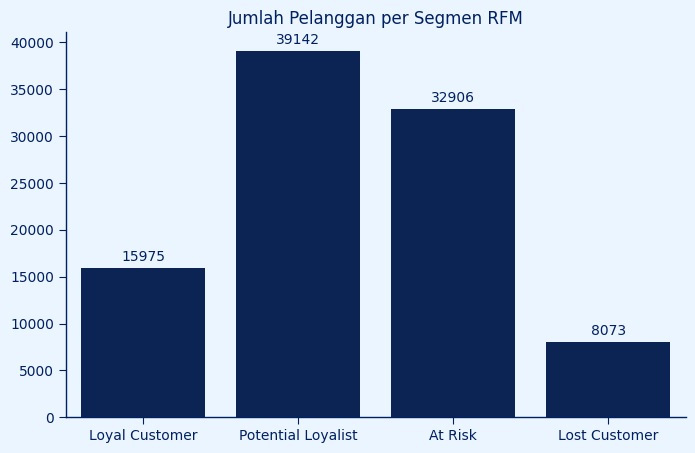

In [80]:
# Menentukan urutan kategori
order = ["Loyal Customer", "Potential Loyalist", "At Risk", "Lost Customer"]

# Konversi kolom ke kategori sesuai urutan
rfm["Customer_Segment"] = pd.Categorical(
    rfm["Customer_Segment"], categories=order, ordered=True
)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=rfm, x="Customer_Segment", order=order)

# Tambahkan label di atas bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="baseline",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.set_title("Jumlah Pelanggan per Segmen RFM")
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.show()

## Conclusion

- **São Paulo** merupakan kota dengan jumlah konsumen terbanyak, begitu pula **São Paulo** sebagai negara bagian dengan jumlah konsumen terbanyak.  
- **Bed, Bath & Table** merupakan kategori produk dengan jumlah transaksi terbanyak, sedangkan **Health & Beauty** menghasilkan total pendapatan tertinggi.  
- **Credit Card** menjadi metode pembayaran yang paling banyak digunakan sekaligus memiliki total pendapatan tertinggi, jauh melampaui metode pembayaran lainnya.

In [81]:
# Eksport data ke dalam file CSV
main_df.to_csv("./dashboard/main_data.csv", index=False, encoding="utf-8")